# 数据预处理

In [ ]:
#导入数据
import pandas as pd
data = pd.read_csv(r'E:\本科\数据挖掘与商务分析\hw\final\Yelp\sample\restaurants_at_pa.txt', sep='\t')
data.head()

,business_id,name,address,latitude,longitude,stars,review_count,is_open,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,39.955505,-75.155564,4.0,80,1,"Food, Bubble Tea, Coffee & Tea, Bakeries"
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,39.953949,-75.143226,4.0,245,1,"Sushi Bars, Japanese"
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,39.943223,-75.162568,4.5,205,1,Korean
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,39.939825,-75.157447,4.0,65,0,"Cocktail Bars, Bars, Italian, Nightlife"
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,40.022466,-75.218314,3.0,41,0,"Pizza, Salad, Soup"


In [5]:
# 查看数据详情
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   5852 non-null   object 
 1   name          5852 non-null   object 
 2   address       5825 non-null   object 
 3   latitude      5852 non-null   float64
 4   longitude     5852 non-null   float64
 5   stars         5852 non-null   float64
 6   review_count  5852 non-null   int64  
 7   is_open       5852 non-null   int64  
 8   categories    5829 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 411.6+ KB


In [6]:
#删除空值
data = data.dropna()
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5802 entries, 0 to 5851
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   5802 non-null   object 
 1   name          5802 non-null   object 
 2   address       5802 non-null   object 
 3   latitude      5802 non-null   float64
 4   longitude     5802 non-null   float64
 5   stars         5802 non-null   float64
 6   review_count  5802 non-null   int64  
 7   is_open       5802 non-null   int64  
 8   categories    5802 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 453.3+ KB


## 拆解categories字段

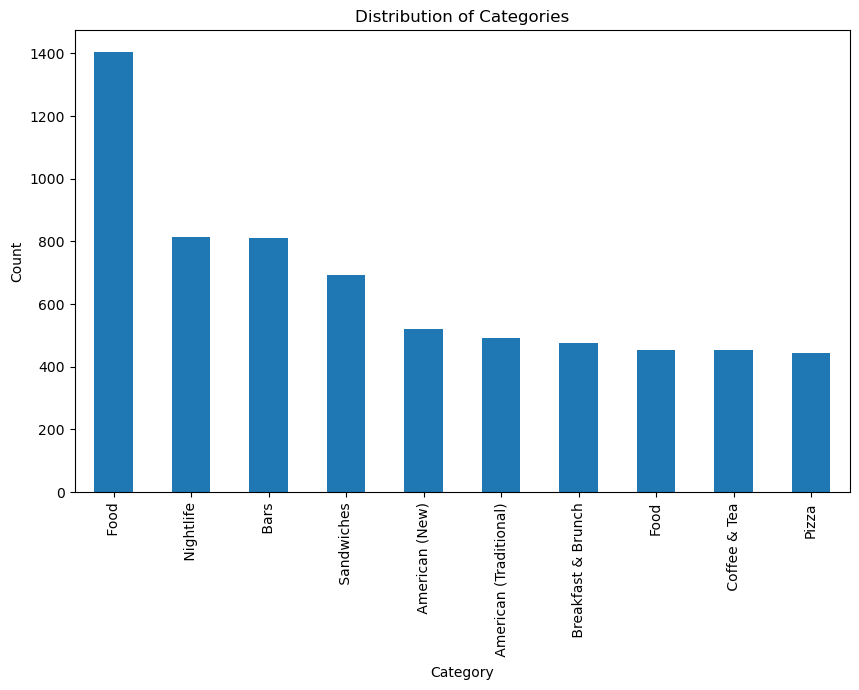

[' Food',
 ' Nightlife',
 ' Bars',
 ' Sandwiches',
 ' American (New)',
 ' American (Traditional)',
 ' Breakfast & Brunch',
 'Food',
 ' Coffee & Tea',
 'Pizza']

In [ ]:
#拆分类别
all_categories = data['categories'].str.split(',', expand=True).stack()
all_categories.value_counts()

#可视化前10个
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
all_categories.value_counts().head(10).plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#top10
top_categories = all_categories.value_counts().head(10).index.tolist()
top_categories

In [23]:
#为top10category进行onehot编码

